In [1]:
import RAP_MASTER_LIB
#MY LIBRARIES -- towards the end of project/when you need a break write up documentaiton of libraries
#another library for plotting and testing
from rap_scrpr import *
from rap_db import *
from rap_clean import*
import matplotlib.pyplot as plt
from statistics import mean, median 
estconn = pg2.connect(database='rap_songs', user='keenan', host='localhost', password='keenan')
#create_music_tables(estconn)

import RAP_MASTER_LIB
import re
from bs4 import BeautifulSoup
import urllib
import time
import json
import psycopg2 as pg2
import psycopg2.extras

from rap_scrpr import *
from rap_db import *
from rap_clean import*
#nltk.download()
from os import listdir
from os.path import isfile, join

estconn = pg2.connect(database='rap_songs', user='keenan', host='localhost', password='keenan')
#create_music_tables(estconn)

In [1]:
#scrape artist
#create_music_tables(estconn, bypass = True)
#new_artists = scrape_multi_artists(estconn, ['10sion'])
#load them into db
#bulk_load(estconn, new_artists)
#create the artist, album, song, and verse objects
works = construct_artists(estconn, art_list = ['Del', 'Chance the Rapper','MF Doom'], use_ind_artists=False)

NameError: name 'construct_artists' is not defined

In [10]:
works.append(construct_artists(estconn, art_list = ['50 Cent'], use_ind_artists=False))

what you did
implemented construct artists on the backend
you enter artist, albums, songs and it filters any matchces it finds of that

next is viz and modeling forsure

In [2]:
works = construct_artists(estconn, art_list = ['MF Doom'], use_ind_artists=False)

CHANGING BACK END TO REMOVE SOUND EFFECTS LIKE (),{},**,ETC. IMPT, LEFT COMMENT AT LINE 197

In [3]:
#this is sick

MF Doom


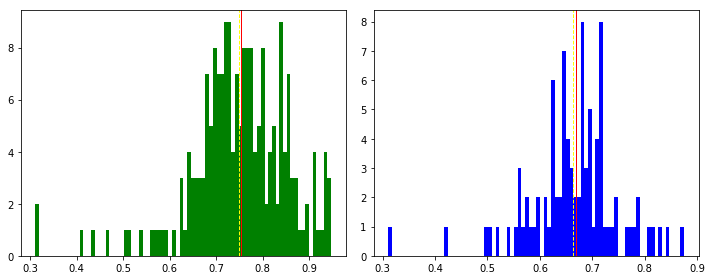

Verses: 0.7490168114368381 0.7540322580645161 Songs: 0.6631320404568865 0.6681043282972642


In [4]:
def quick_plot(artist_obj_list, b = 80):
    #good start, build on ideas from here
    #this is too messy for your final shit
    for art in artist_obj_list:
        #by verse
        uniq_vs = []
        for v in art.verses:
            uniq_vs.append(len(v.unique_words)/len(v.all_words))
        #by song
        uniq_ss = []
        for s in art.songs:
            one_song = set()
            one_song_all = []
            for seg in s.segments:
                if type(seg) == verse:
                    one_song = one_song|seg.unique_words
                    one_song_all.extend(seg.all_words)
            if one_song and one_song_all:
                uniq_ss.append(len(one_song)/len(one_song_all))
        print(art.name)
        
        #graphs
        fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
        ax1.hist(uniq_vs, bins=b, color='green')
        ax1.axvline(mean(uniq_vs), color='yellow', linestyle='dashed', linewidth=1)
        ax1.axvline(median(uniq_vs), color='red', linestyle='solid', linewidth=1)
        ax2.hist(uniq_ss, bins=b, color='blue')
        ax2.axvline(mean(uniq_ss), color='yellow', linestyle='dashed', linewidth=1)
        ax2.axvline(median(uniq_ss), color='red', linestyle='solid', linewidth=1)
        fig.tight_layout()
        plt.show()
        print('Verses:',mean(uniq_vs), median(uniq_vs),'Songs:',mean(uniq_ss), median(uniq_ss))        
quick_plot(works)

In [5]:
all_verses = []
for v in works[0].verses:
    all_verses.append((len(v.unique_words)/len(v.all_words), v.content, v.unique_words))
all_verses = sorted(all_verses, reverse=True)

In [6]:
for a in all_verses[:5]:
    print(a[0], a[1])
    print()

0.9473684210526315 
Run up in your fucking lab looking for goodies
A hundred tooties decked out in fatass robes and St Vitus hoodies
Three man team screaming for vengeance
I shed repentence until my last sentence
Time to end this

0.9473684210526315 
Looking at his henny sip
Look at little pretty chicks
Sucka's tryin to penny flip
niggaz looping any shit



0.9428571428571428 
On the strength, she wasn't lent three cent
Got her own connect for free rent off the cement
Now what if that was your moms Short arms 
Quarter waters to bottles of Dom bought the 



0.9393939393939394 
No doubt 
Krazy world, get it where you fit in...
....

"Attention: We have heard from the control center on Monster Island that the 
two monsters have broken out. All men stand by!"

0.9375 
MF DOOM, QUAS high like sky scrappers
Quasimoto gettin more ass than toilet paper

Who

Astro Black on attack you up on the bozack
Know smarts
Lightweight
Ya bald head like Cojack





0.9473684210526315 
Run up in your fucking lab looking for goodies
A hundred tooties decked out in fatass robes and St Vitus hoodies
Three man team screaming for vengeance
I shed repentence until my last sentence
Time to end this

0.9473684210526315 
Looking at his henny sip
Look at little pretty chicks
Sucka's tryin to penny flip
niggaz looping any shit



0.9428571428571428 
On the strength, she wasn't lent three cent
Got her own connect for free rent off the cement
Now what if that was your moms Short arms 
Quarter waters to bottles of Dom bought the 



0.9393939393939394 
No doubt 
Krazy world, get it where you fit in...
....

"Attention: We have heard from the control center on Monster Island that the 
two monsters have broken out. All men stand by!"

0.9375 
MF DOOM, QUAS high like sky scrappers
Quasimoto gettin more ass than toilet paper

Who

Astro Black on attack you up on the bozack
Know smarts
Lightweight
Ya bald head like Cojack


what you did

started vizing and analying
def found some continuty stuff gonna have to decide on
should "" be included?
are verses being segmented too quickly? (not much to do here)
vizs look good so far, keep trucking there

what's next
plan out vizs
plant out meta data you want
make meta data calcs and graphing backend
possibly add that stuff to db (maybe)

In [7]:
estconn.close()